In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("C:\\Users\\amiro\\Desktop\\Internship cognifiz\\Dataset .csv")

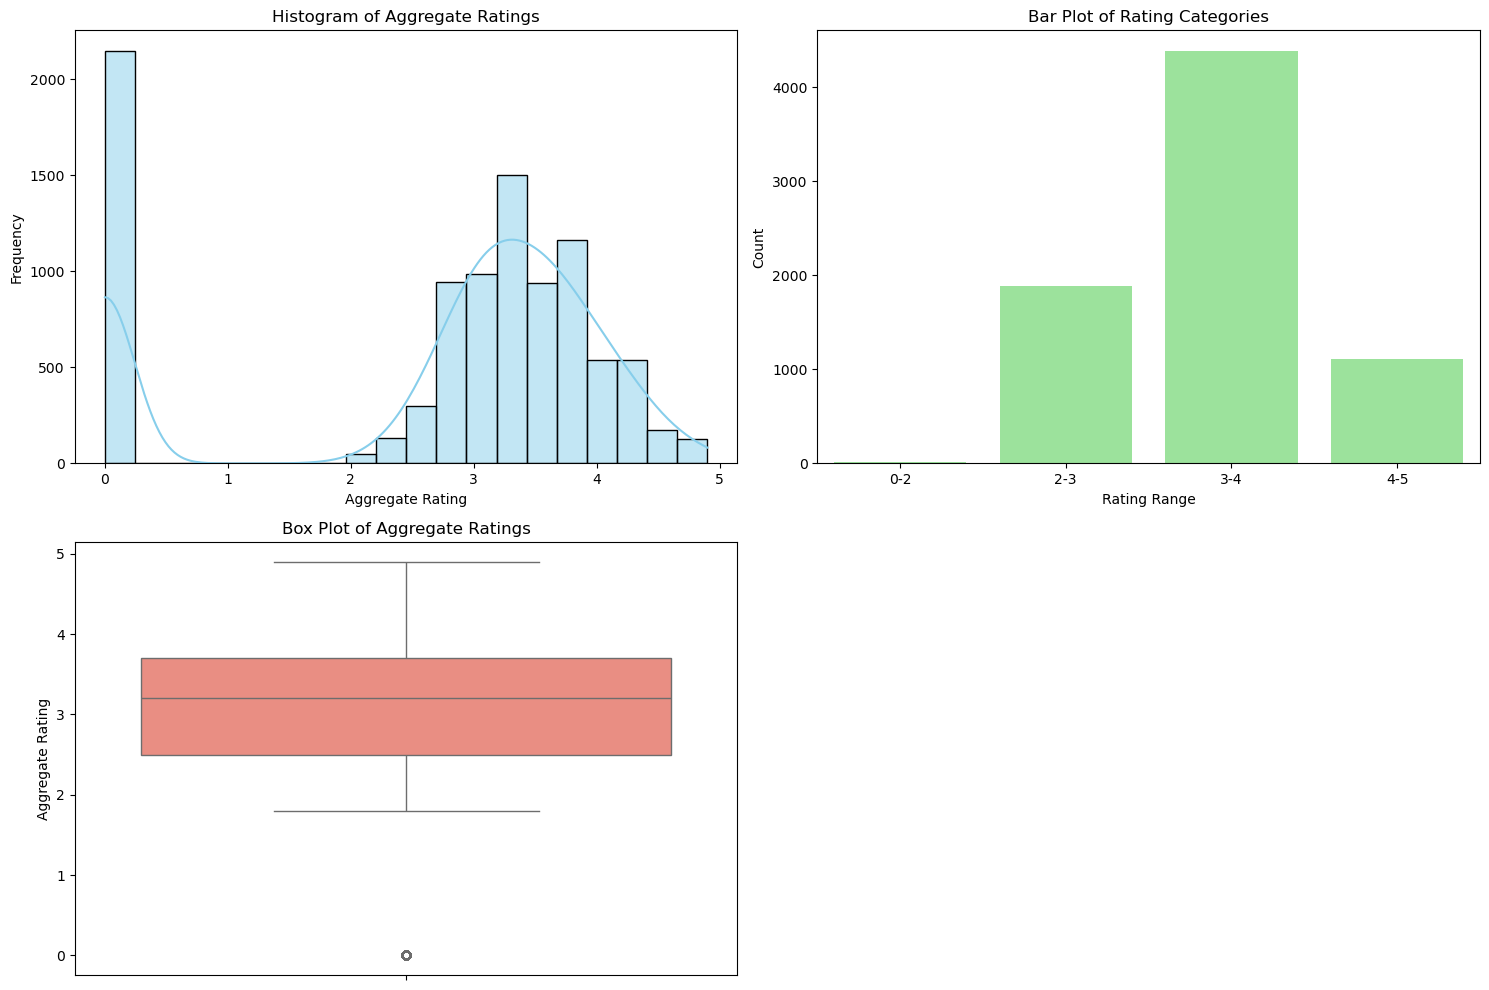

In [5]:
# Step 1: Distribution of Ratings
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')

rating_bins = pd.cut(df['Aggregate rating'], bins=[0, 2, 3, 4, 5], labels=['0-2', '2-3', '3-4', '4-5'])
rating_counts = rating_bins.value_counts().sort_index()
plt.subplot(2, 2, 2)
sns.barplot(x=rating_counts.index, y=rating_counts.values, color='lightgreen')
plt.title('Bar Plot of Rating Categories')
plt.xlabel('Rating Range')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.boxplot(y=df['Aggregate rating'], color='salmon')
plt.title('Box Plot of Aggregate Ratings')
plt.ylabel('Aggregate Rating')

plt.tight_layout()
plt.show()


Average Rating by Top 10 Cuisines:
Cuisine
Italian         3.562042
Continental     3.518750
Cafe            3.321195
Desserts        2.978867
Chinese         2.621024
Mughlai         2.609950
Fast Food       2.563092
North Indian    2.510455
South Indian    2.469811
Bakery          2.440940
Name: Aggregate rating, dtype: float64


C:\Users\amiro\AppData\Local\Temp\ipykernel_13168\642750362.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_cuisine.index, y=avg_rating_by_cuisine.values, palette='viridis')


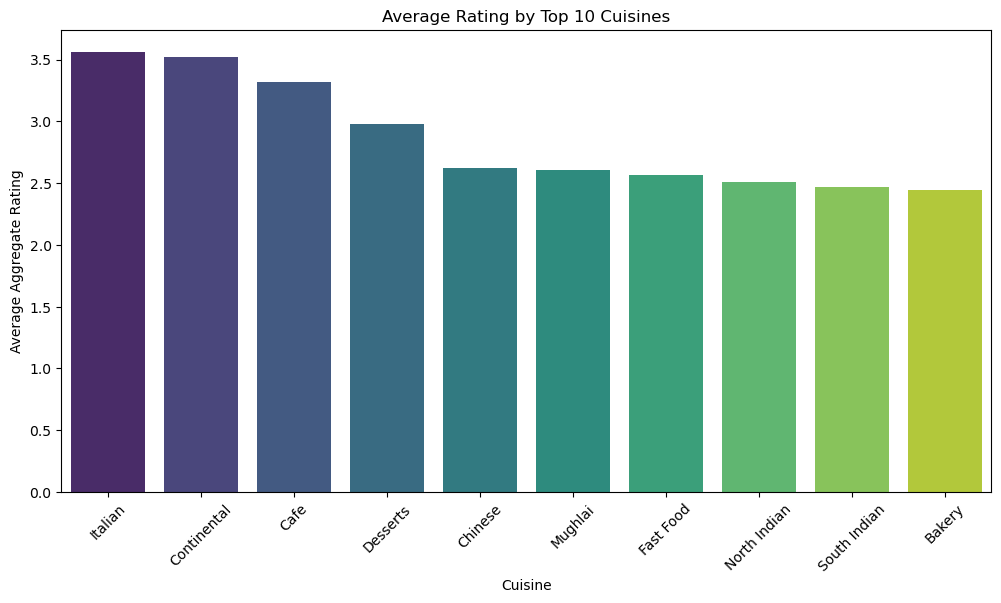


Average Rating by Top 10 Cities:
City
Lucknow         4.195238
Guwahati        4.190476
Ahmedabad       4.161905
Bhubaneshwar    3.980952
Amritsar        3.685714
Ghaziabad       2.852000
Gurgaon         2.651431
New Delhi       2.438845
Noida           2.036204
Faridabad       1.866932
Name: Aggregate rating, dtype: float64


C:\Users\amiro\AppData\Local\Temp\ipykernel_13168\642750362.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_city.index, y=avg_rating_by_city.values, palette='magma')


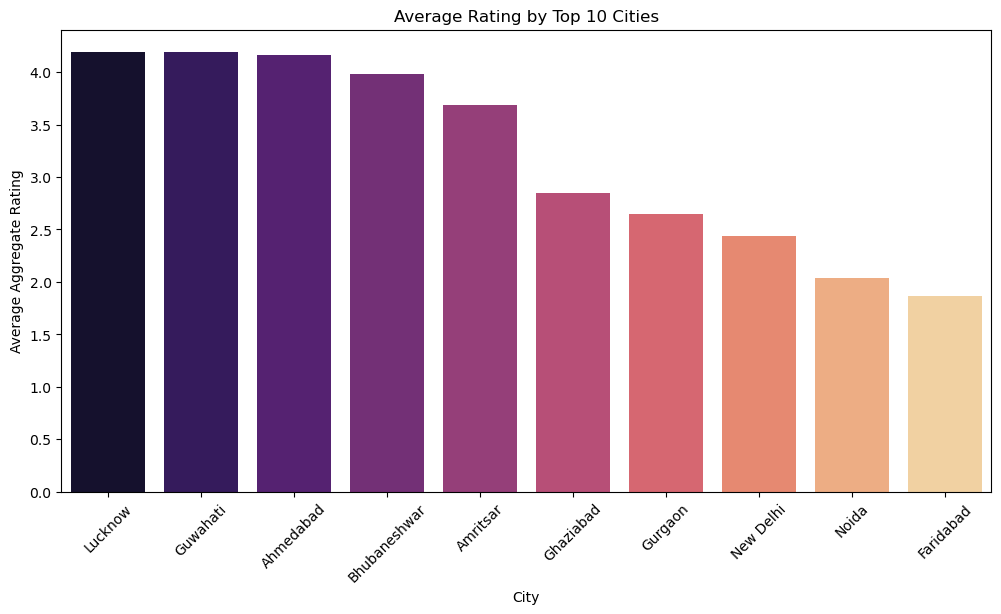

In [9]:
# Step 2: Average Ratings by Cuisine and City
# Cuisines
# Handle missing values in 'Cuisines' before processing
df['Cuisines'] = df['Cuisines'].fillna('Unknown')  # Replace NaN with 'Unknown'
cuisines_series = df['Cuisines'].str.split(', ').explode()  # Split and explode

# Create a DataFrame with repeated rows for each cuisine
# Use a safer approach to handle lengths
cuisine_counts = df['Cuisines'].str.split(', ').str.len().fillna(1).astype(int)  # Default to 1 if NaN
cuisine_ratings = df.loc[df.index.repeat(cuisine_counts)].assign(Cuisine=cuisines_series.values)

# Get top 10 cuisines and their average ratings
top_cuisines = cuisine_ratings['Cuisine'].value_counts().head(10).index
avg_rating_by_cuisine = cuisine_ratings[cuisine_ratings['Cuisine'].isin(top_cuisines)].groupby('Cuisine')['Aggregate rating'].mean().sort_values(ascending=False)

print("\nAverage Rating by Top 10 Cuisines:")
print(avg_rating_by_cuisine)

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_by_cuisine.index, y=avg_rating_by_cuisine.values, palette='viridis')
plt.title('Average Rating by Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=45)
plt.show()

# Cities (unchanged, as it doesn't involve 'Cuisines')
top_cities = df['City'].value_counts().head(10).index
avg_rating_by_city = df[df['City'].isin(top_cities)].groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nAverage Rating by Top 10 Cities:")
print(avg_rating_by_city)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_by_city.index, y=avg_rating_by_city.values, palette='magma')
plt.title('Average Rating by Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=45)
plt.show()

C:\Users\amiro\AppData\Local\Temp\ipykernel_13168\2491712618.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='coolwarm')


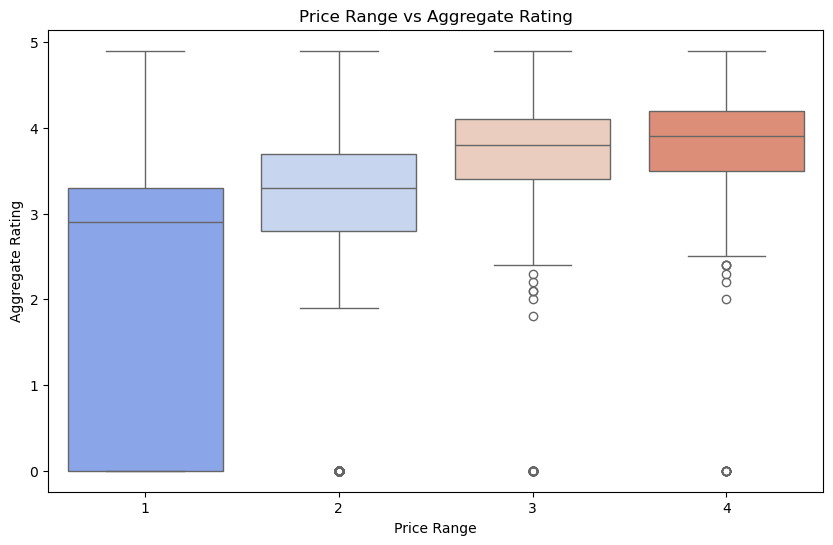

C:\Users\amiro\AppData\Local\Temp\ipykernel_13168\2491712618.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Has Table booking', y='Aggregate rating', data=df, palette='Set2')


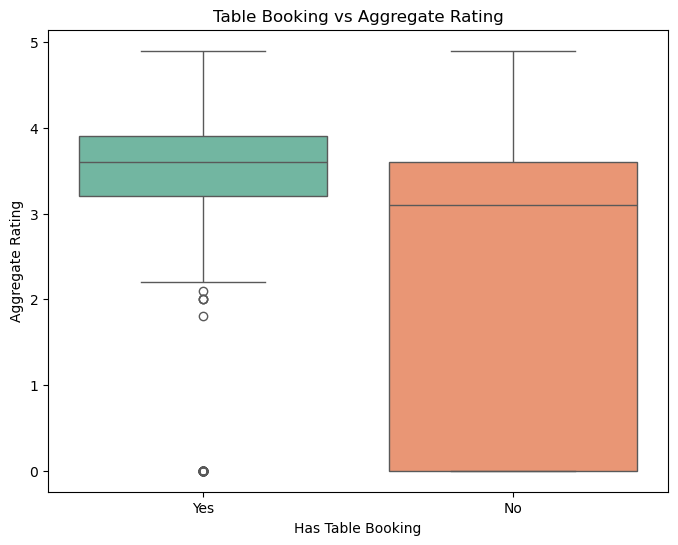

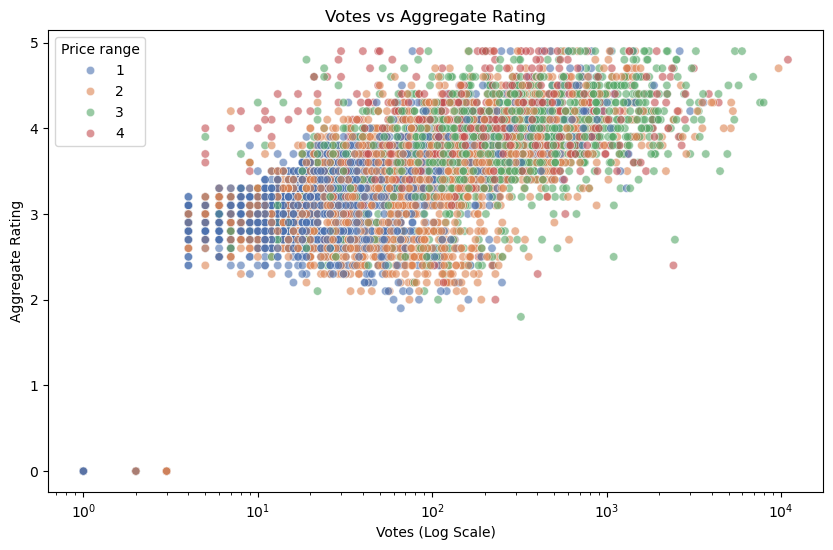

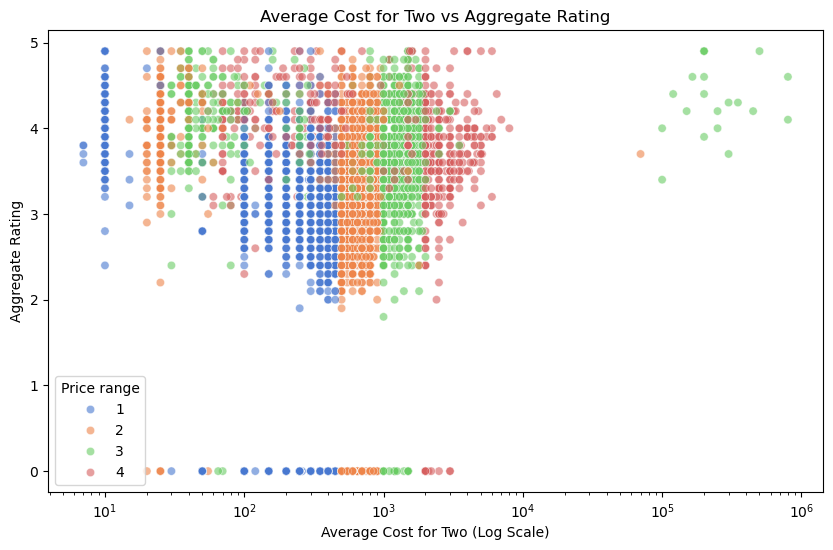

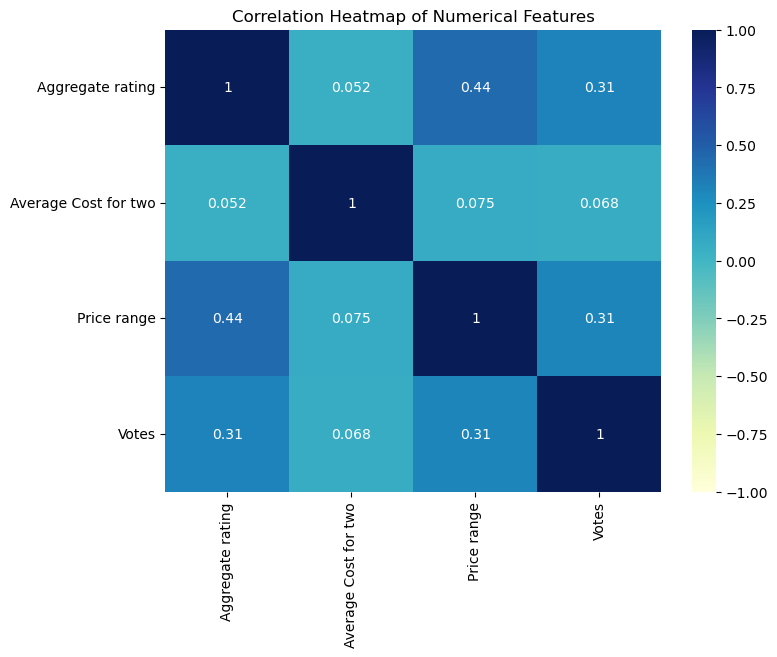

In [11]:
# Step 3: Relationships with Aggregate Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='coolwarm')
plt.title('Price Range vs Aggregate Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Has Table booking', y='Aggregate rating', data=df, palette='Set2')
plt.title('Table Booking vs Aggregate Rating')
plt.xlabel('Has Table Booking')
plt.ylabel('Aggregate Rating')
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, hue='Price range', palette='deep', alpha=0.6)
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Votes (Log Scale)')
plt.ylabel('Aggregate Rating')
plt.xscale('log')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=df, hue='Price range', palette='muted', alpha=0.6)
plt.title('Average Cost for Two vs Aggregate Rating')
plt.xlabel('Average Cost for Two (Log Scale)')
plt.ylabel('Aggregate Rating')
plt.xscale('log')
plt.show()

numerical_cols = ['Aggregate rating', 'Average Cost for two', 'Price range', 'Votes']
correlation = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()